In [3]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

In [4]:
sys.path.insert(1, '/home/ujwal/ML_program/Trading_financial_market/Predicting_AUDUSD_Using_Major_Regression_Models')
from ipynb.fs.defs.Data_preprocessing import sampling_multi_target


In [5]:
n_steps_back = 60
n_steps_future=10

train_X, train_Y, val_X, val_Y, test_X, test_Y,  = sampling_multi_target(n_steps_back, n_steps_future)

In [6]:
train_X.shape

(92464, 60)

In [7]:
train_Y.shape

(92464, 10)

In [21]:
import numpy as np
RFRModel = RandomForestRegressor(n_jobs=-1, n_estimators= 1000)
RFRModel.fit(train_X,train_Y)

#test data
preds = RFRModel.predict(test_X)
MAE_t = mean_absolute_error(test_Y, preds)

#val data
preds_val = RFRModel.predict(val_X)
MAE_v = mean_absolute_error(val_Y, preds_val)

print(MAE_t, MAE_v)

[I 2022-12-04 20:35:24,398] Trial 0 finished with value: 0.0019893526052138987 and parameters: {'warm_start': False}. Best is trial 0 with value: 0.0019893526052138987.


0.0014785119355712108 0.001990036430224889


In [34]:

def return_score(param):
    XGBModel = RandomForestRegressor(**param, n_jobs= -1)  
    XGBModel.fit(X=train_X, y=train_Y)
    preds = XGBModel.predict(val_X)
    mae = mean_absolute_error(val_Y, preds)    
    return mae


In [15]:
param ={'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
a = return_score(param)
a

0.0019765819288796644

In [8]:
RFRModel.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [29]:
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler
from sklearn.metrics import mean_absolute_error 
import numpy as np
import pandas as pd

def objective(trial):
    param = {
    'ccp_alpha': trial.suggest_float("ccp_alpha", 0.0, 10),
    'criterion': 'squared_error',
    'max_depth': trial.suggest_int("max_depth", 1, 500),
    'max_features': trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
    'max_leaf_nodes': trial.suggest_int("max_leaf_nodes", 2, 500),
    'max_samples': trial.suggest_int("max_samples", 1, 500),
    'min_impurity_decrease': trial.suggest_float("min_impurity_decrease", 0.0, 10),
    'min_samples_leaf': trial.suggest_int("min_samples_leaf", 1, 100),
    'min_samples_split': trial.suggest_int("min_samples_split", 2, 100),
    'min_weight_fraction_leaf': trial.suggest_float("min_weight_fraction_leaf", 0.0, 0.5),
    'n_estimators': trial.suggest_int("n_estimators", 100, 500),
    'n_jobs': -1,
    'oob_score': trial.suggest_categorical("oob_score", [True, False]),
    'random_state': 1,
    'verbose': 0,
    'warm_start': trial.suggest_categorical("warm_start", [True, False])
    }
    return(return_score(param)) # this will return the mae score


In [30]:

study = optuna.create_study(storage=None, direction='minimize',sampler=TPESampler(seed=1))
study.optimize(objective, n_trials=500, show_progress_bar = True, n_jobs=-1)

[I 2022-12-04 21:21:03,935] A new study created in memory with name: no-name-09e31e1c-a5f8-4c46-b879-8748ef1f76a6
/home/ujwal/anaconda3/lib/python3.9/site-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/500 [00:00<?, ?it/s]

[I 2022-12-04 21:21:09,968] Trial 7 finished with value: 0.17351987878203637 and parameters: {'ccp_alpha': 2.4244851584541163, 'max_depth': 255, 'max_features': 'log2', 'max_leaf_nodes': 267, 'max_samples': 286, 'min_impurity_decrease': 5.991521577070803, 'min_samples_leaf': 59, 'min_samples_split': 93, 'min_weight_fraction_leaf': 0.2845432705296435, 'n_estimators': 155, 'oob_score': False, 'warm_start': True}. Best is trial 7 with value: 0.17351987878203637.
[I 2022-12-04 21:21:12,172] Trial 3 finished with value: 0.1740725745932858 and parameters: {'ccp_alpha': 7.6348628058841905, 'max_depth': 119, 'max_features': 'sqrt', 'max_leaf_nodes': 247, 'max_samples': 91, 'min_impurity_decrease': 3.194285477712935, 'min_samples_leaf': 45, 'min_samples_split': 36, 'min_weight_fraction_leaf': 0.3510176801927045, 'n_estimators': 276, 'oob_score': False, 'warm_start': False}. Best is trial 7 with value: 0.17351987878203637.
[I 2022-12-04 21:21:14,641] Trial 6 finished with value: 0.17351891517359

In [31]:
tune_params = study.best_params
tune_params

{'ccp_alpha': 6.6711824598543386,
 'max_depth': 65,
 'max_features': None,
 'max_leaf_nodes': 327,
 'max_samples': 225,
 'min_impurity_decrease': 1.5397745003307408,
 'min_samples_leaf': 38,
 'min_samples_split': 25,
 'min_weight_fraction_leaf': 0.2695810301799598,
 'n_estimators': 381,
 'oob_score': True,
 'warm_start': False}

In [35]:
params = {}
print(f"without tuning {return_score(params)}")
print(f"with tuning {return_score(study.best_params)}")
# defoult parameter Wins.

without tuning 0.002001837225421379
with tuning 0.1738651454017613


In [36]:
# Training with defoult parameter since tuning required more number of trail.
RFRModel = RandomForestRegressor(n_jobs=-1)
RFRModel.fit(X=train_X, y=train_Y)

# test data
preds = RFRModel.predict(test_X)
mae_t = mean_absolute_error(test_Y, preds)

#val data
preds_val = RFRModel.predict(val_X)
mae_v = mean_absolute_error(val_Y, preds_val)

print(mae_t, mae_v)

0.0014865577712821518 0.0019910300663536023


In [37]:
# Unused test dataset
print("Test data")
print("MAE=", mae_t, "\n")

# val dataset
print("Val data")
print("MAE=", mae_v)

Test data
MAE= 0.0014865577712821518 

Val data
MAE= 0.0019910300663536023


Text(0, 0.5, 'Predicted Y')

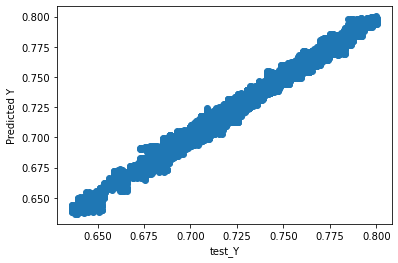

In [38]:
import matplotlib.pyplot as plt
plt.scatter(test_Y,preds)
plt.xlabel('test_Y')
plt.ylabel('Predicted Y')

In [39]:
# Check mse using Linear regression
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(test_Y,preds))
print('MSE :'," ", metrics.mean_squared_error(test_Y,preds))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(test_Y,preds)))

MAE :   0.0014865577712821518
MSE :   4.771325308848643e-06
RMSE :   0.0021843363543302212


/home/ujwal/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

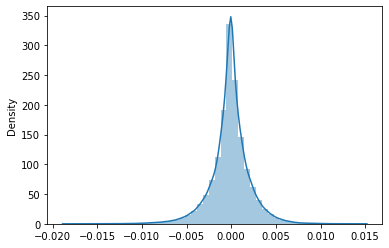

In [40]:
sns.distplot(test_Y - preds, bins=50)

In [41]:
# save model using pickle
import pickle
pickle.dump(RFRModel, open('RandomForestRegressor.pkl', 'wb'))

In [42]:
# loading model
import pickle
RandomForestRegressor_model = pickle.load(open('RandomForestRegressor.pkl', 'rb'))

In [43]:
forecast_data = test_X[-1].reshape(1,-1)
forecast = RandomForestRegressor_model.predict(forecast_data)
forecast

array([[0.6398495, 0.6404636, 0.6408333, 0.6406033, 0.6403564, 0.639855 ,
        0.6395626, 0.6396204, 0.6393716, 0.6392907]])